# DatafestAfrica ML Hackathon
>Help a Financial Industry predict who is likely to complete an E-process application

1. Entry_id : User Identifier - client
2. age: Age of user
3. pay_schedule: How often applicants get paid
4. home_owner: 0:- Rented home 1:- Owner
5. income: Applicant income
6. months_employed: How many months has he been doing the job
7. years_employed: How many years he been doing job
8. current_address_year: How many years a person stayed at the current address
9. personal_account_m: How many months that person had a personal account
10. personal_account_y: How many years has that person had a personal account
11. has_debt: If the individual has debt
12. amount_requested: Loan amount requested
13. risk_score_n (1,2,3,4,5):- Various scores are defined by regulations and 14. internal processes to classify individual risks
15. ext_quality_score_n (1 & 2): External quality scores defined for each individual
16. inquiries_last_month: Number of times an individual made inquiries in the previous month.
>Target:

1. e_signed: If the application was completed as an e-signing process or not

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.labelpad'] = 12
sns.set_style("darkgrid")


In [ ]:
train = pd.read_csv("/content/train.csv")
train.head(3)

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1


In [ ]:
test = pd.read_csv("/content/test.csv")
test.head(3)

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
1,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
2,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8


In [ ]:
train.shape, test.shape

((12516, 21), (5392, 20))

In [ ]:
train.isnull().sum()

Entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [ ]:
test.isnull().sum()

Entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

In [ ]:
train.describe()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.251600e+04,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000
mean,5.599485e+06,43.026766,0.425056,3654.110658,1.191355,3.532998,3.593161,3.402205,3.508469,0.795462,950.251518,61133.401246,0.690665,0.877954,0.582848,0.718456,0.621944,0.621912,6.494088,0.540588
std,2.563354e+06,11.865891,0.494371,1508.072163,2.404529,2.265293,2.749211,2.206649,1.959969,0.403380,706.915146,15396.809340,0.090294,0.054197,0.125260,0.121103,0.139876,0.139623,3.731870,0.498370
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.376885e+06,34.000000,0.000000,2575.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49450.000000,0.641221,0.850893,0.499887,0.635005,0.519794,0.519662,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3255.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699621,0.880993,0.588202,0.725717,0.624081,0.623781,6.000000,1.000000
75%,7.803325e+06,51.000000,1.000000,4661.250000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752053,0.911485,0.672431,0.806576,0.729609,0.728389,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,14.000000,1.000000,10200.000000,99750.000000,0.999997,0.999012,0.978932,0.993363,0.970249,0.966953,30.000000,1.000000


## EXPLORATORY DATA ANALYSIS 

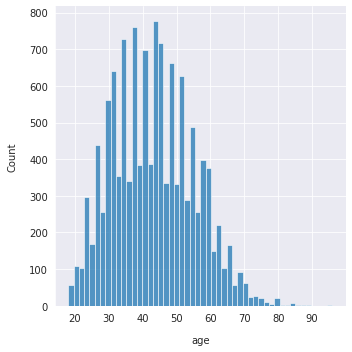

In [ ]:
#Get age distribution 


sns.displot(x=train['age'], bins=50)
plt.show()

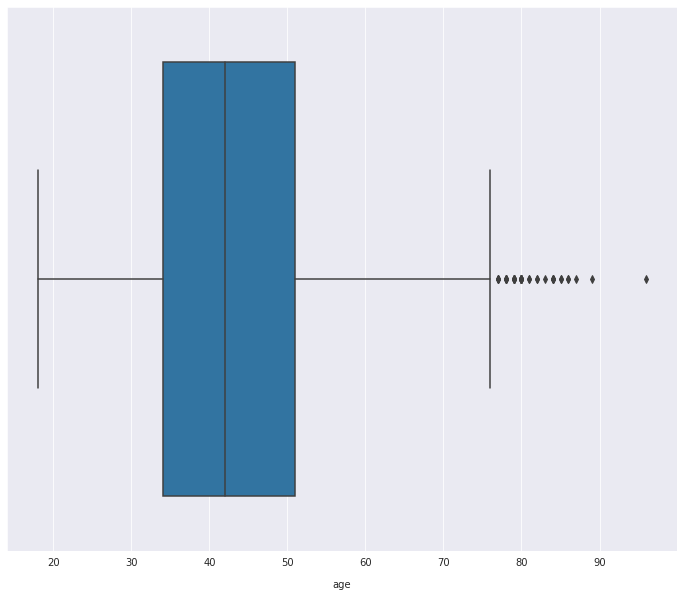

In [ ]:
#AGE
#Check for outliers 

sns.boxplot(x=train.age)
plt.show()



In [ ]:
#Labal train data 
train['e_signed'] = np.where(train['e_signed']==0, "not_complete", "complete")

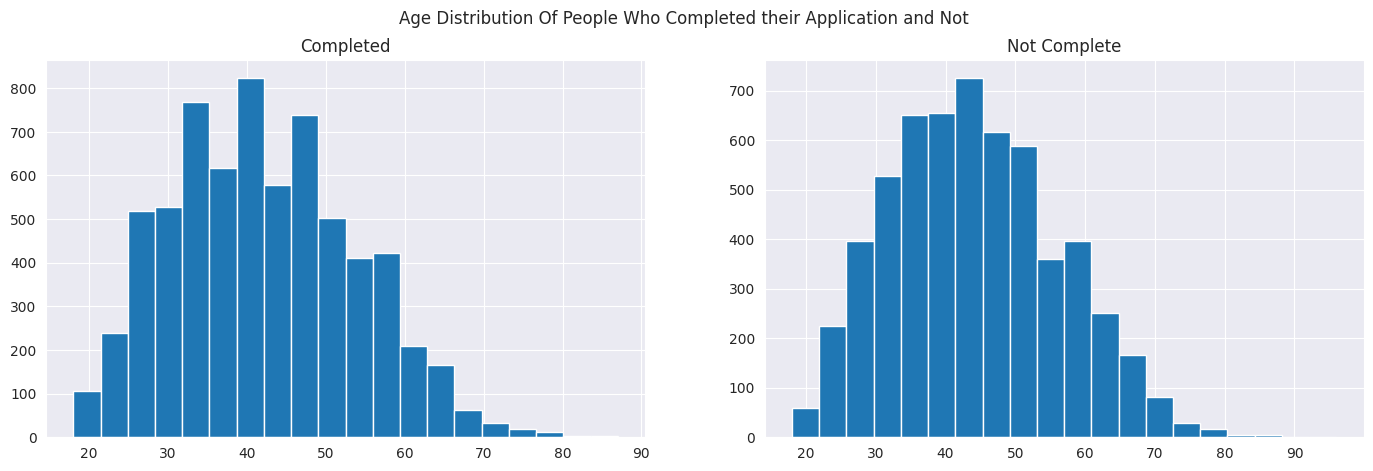

In [ ]:
#Let's get a unique distribution between age of people that got that their application completed as an e-signing process or not. 

fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)

#Age of those who completed
completed=train[train["e_signed"]=="complete"]['age']

#plotting the histogram
ax1.hist(completed,bins = 20)
ax1.set_title('Completed')

#Age of those who didn't complete
not_complete=train[train["e_signed"]=="not_complete"]['age']

#plotting the histogram
ax2.hist(not_complete, bins = 20)
ax2.set_title('Not Complete')
fig.suptitle('Age Distribution Of People Who Completed their Application and Not')
plt.show()

In [ ]:
#From the above dipslot, you can see that the data is skewed. Remove outliers

train = train[train['age'] < 77]
train.shape

(12469, 21)

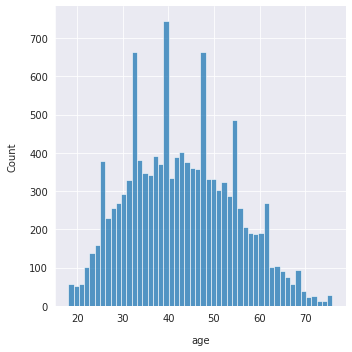

In [ ]:
#Show distribution again without outliers 

sns.displot(x=train['age'], bins=50)
plt.show()

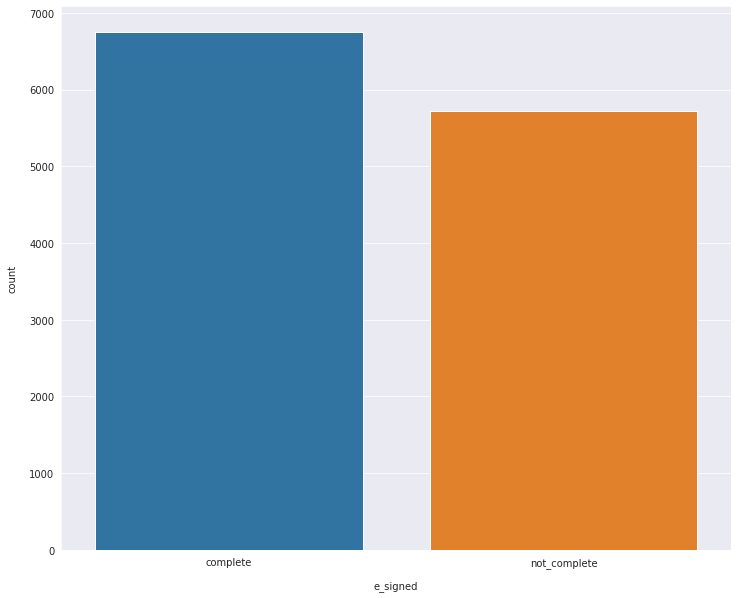

In [ ]:
sns.countplot(x=train['e_signed'])
plt.show()

In [ ]:
#Pay Schedule - pay_schedule: How often applicants get paid
#Get the unique number of the paid schedule since it is a categorical variable 

train['pay_schedule'].unique()

array(['bi-weekly', 'semi-monthly', 'weekly', 'monthly'], dtype=object)

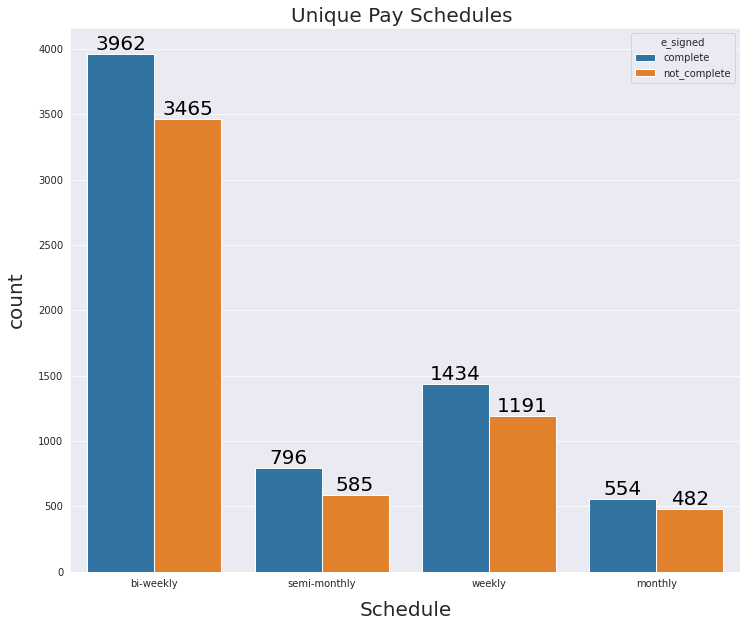

In [ ]:
#Get the plot of the pay schedule and the most frequent 

plt.figure(figsize=(12,10))
ax=sns.countplot(x ="pay_schedule", hue="e_signed", data=train)

#setting the title and fontsize of the x and y axis label of the count plot
ax.set_title("Unique Pay Schedules ", fontsize = 20)
plt.xlabel("Schedule",fontsize=20)
plt.ylabel("count", fontsize=20)

#To Display the count values on top of the countplot
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=20)

In [ ]:
train['home_owner'].value_counts()

0    7174
1    5295
Name: home_owner, dtype: int64

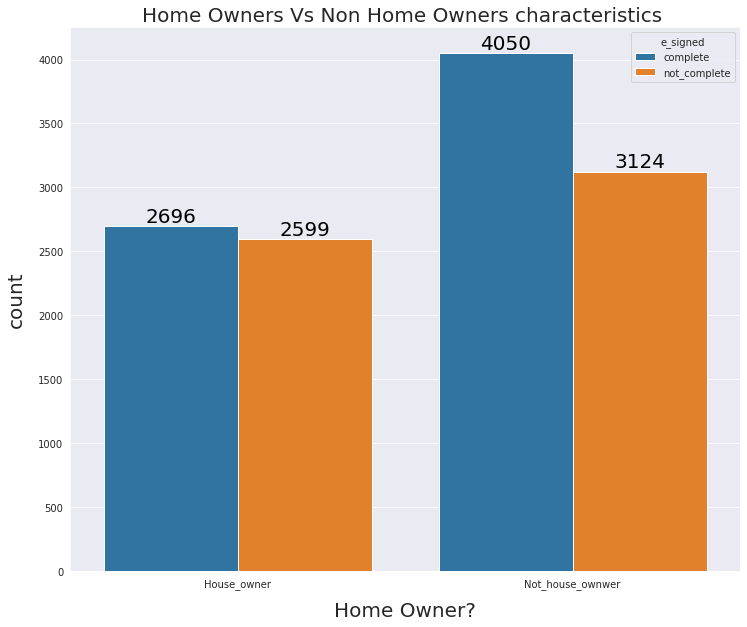

In [ ]:
#Get the count of how many people own homes and their plot

train['home_owner'] = np.where(train['home_owner']==1, "House_owner", "Not_house_ownwer")

plt.figure(figsize=(12,10))
ax=sns.countplot(x ="home_owner", hue="e_signed", data=train)

#setting the title and fontsize of the x and y axis label of the count plot
ax.set_title("Home Owners Vs Non Home Owners characteristics ", fontsize = 20)
plt.xlabel("Home Owner?",fontsize=20)
plt.ylabel("count", fontsize=20)

#To Display the count values on top of the countplot
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=20)

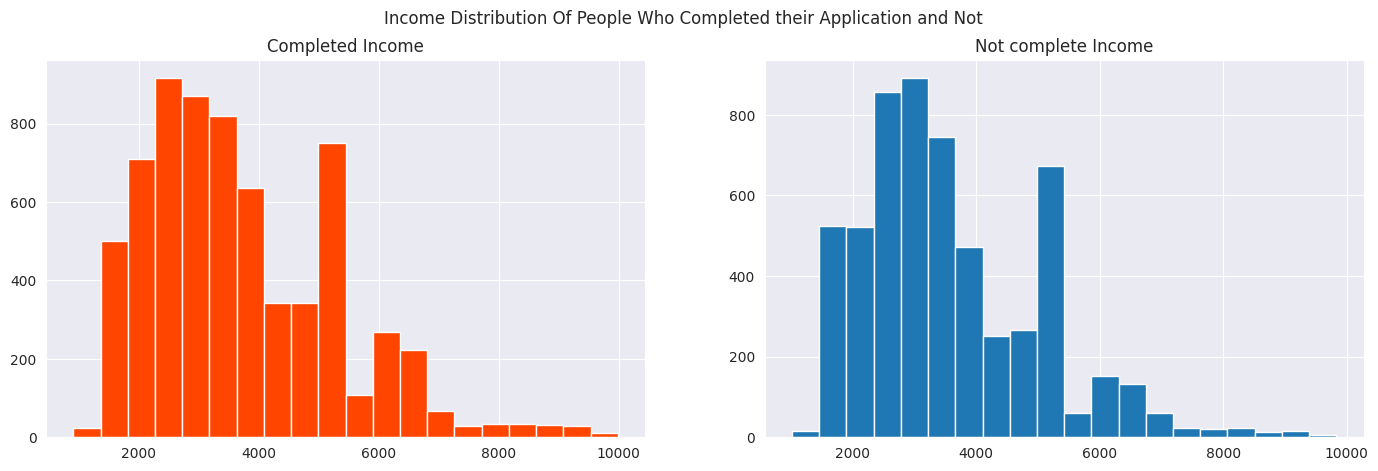

In [ ]:
#Let's get an income distribution of people that got that their application completed as an e-signing process of not. 

fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)

#Imcome of those who completed
completed_income = train[train["e_signed"]=='complete']['income']

#plotting the histogram
ax1.hist(completed_income,bins = 20,color='orangered')
ax1.set_title('Completed Income')

#Age of those who didn't complete 
not_complete_income = train[train["e_signed"]=='not_complete']['income']

#plotting the histogram
ax2.hist(not_complete_income, bins = 20)
ax2.set_title('Not complete Income')
fig.suptitle('Income Distribution Of People Who Completed their Application and Not')
plt.show()

In [ ]:
#Months Employed

train['months_employed'].value_counts()

0     9188
5      681
6      596
1      592
2      354
3      281
4      213
9      157
7      145
10     144
8       87
11      31
Name: months_employed, dtype: int64

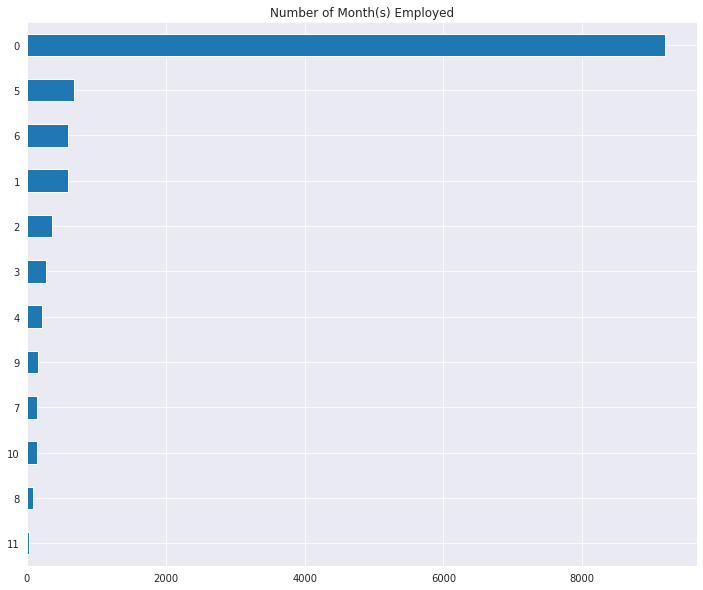

In [ ]:
#Months Employed

train['months_employed'].value_counts().sort_values().plot(kind='barh', title="Number of Month(s) Employed")
plt.show()

We have a lot of people under 0 "months_employed", does it means these people are generally unemployed? or does it mean they are 0 months employed + _years?

If they are unemployed, what is the correlation to completing their form and what how does it affect their behaviors like years of amount requested for, home owner, how long they have stayed in their current address or do they move frequently? Let's find out. 

In [ ]:
#Years Employed
#Years employed denotes that the individual has been employed for a certain year period and months from above and counting. 

train['years_employed'].value_counts()

2     2673
3     2474
1     1690
5     1375
6     1365
4     1304
0      484
7      424
9      265
10     206
8      154
11      30
12      12
13       6
14       3
15       2
16       2
Name: years_employed, dtype: int64

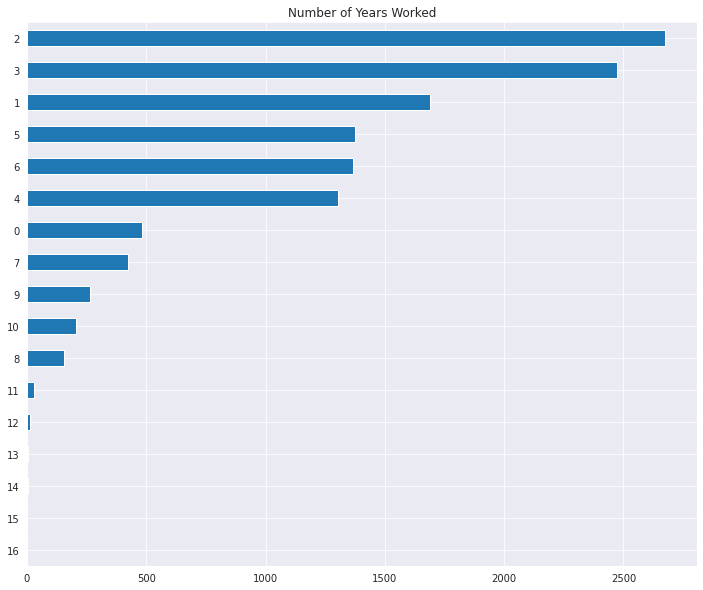

In [ ]:
train['years_employed'].value_counts().sort_values().plot(kind='barh', title='Number of Years Worked')
plt.show()

Text(0, 0.5, 'count')

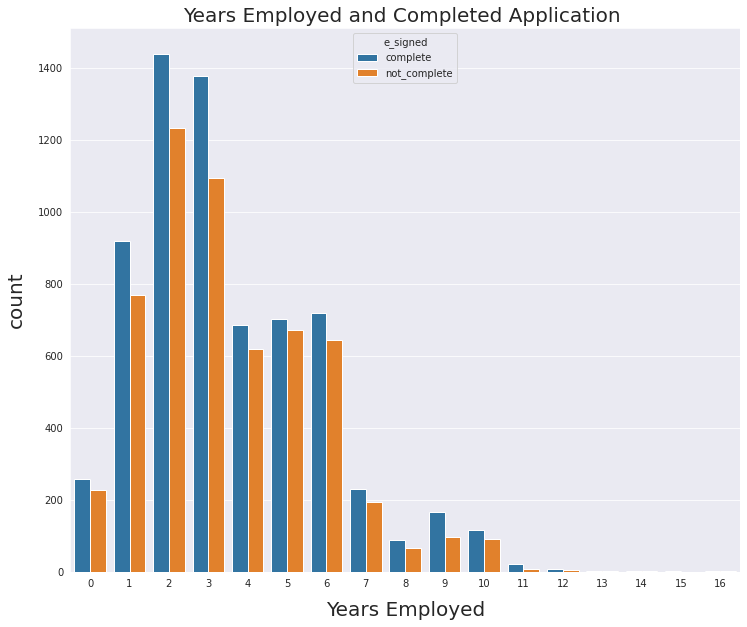

In [ ]:
#Find out how munber of years individual has worked affects e_signed 

plt.figure(figsize=(12,10))
ax=sns.countplot(x ="years_employed", hue="e_signed", data=train)

#setting the title and fontsize of the x and y axis label of the count plot
ax.set_title("Years Employed and Completed Application ", fontsize = 20)
plt.xlabel("Years Employed",fontsize=20)
plt.ylabel("count", fontsize=20)


In [ ]:
train['current_address_year'].value_counts()

2     2533
1     1935
3     1878
4     1390
0     1028
5      909
6      856
9      481
8      465
7      421
10     412
11     156
12       5
Name: current_address_year, dtype: int64

The above count tells us that people with lesser years experience have moved more too in the past years. Let's plot this data with e_signed and see if there is any unique relationships. 

Text(0, 0.5, 'count')

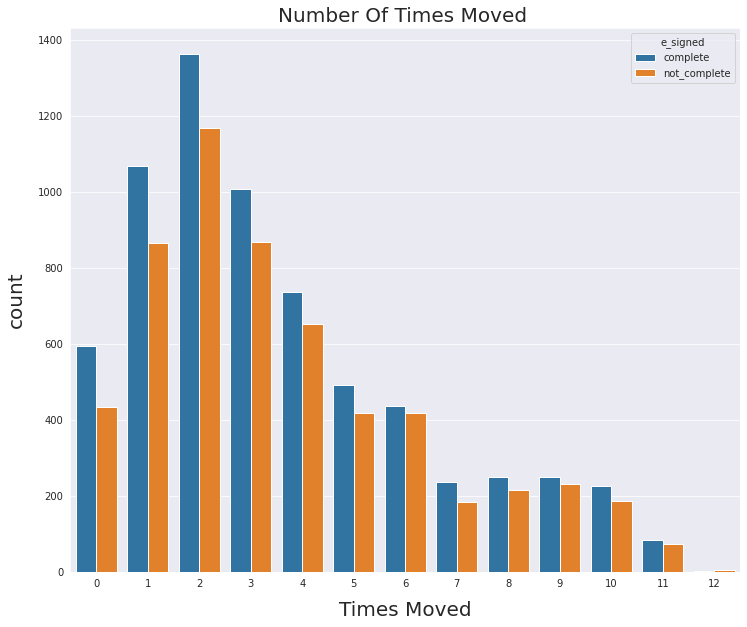

In [ ]:

plt.figure(figsize=(12,10))

ax=sns.countplot(x ="current_address_year", hue="e_signed", data=train)

#setting the title and fontsize of the x and y axis label of the count plot
ax.set_title("Number Of Times Moved ", fontsize = 20)
plt.xlabel("Times Moved",fontsize=20)
plt.ylabel("count", fontsize=20)

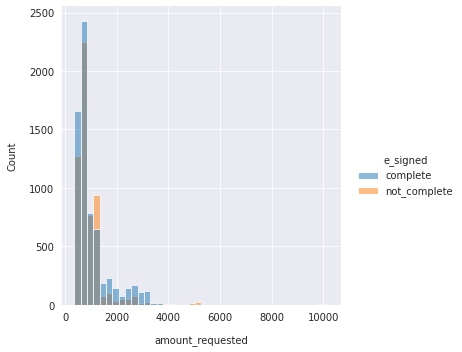

In [ ]:
sns.displot(train, x='amount_requested', hue='e_signed', bins=40)
plt.show()

In [ ]:
#Number of people that had inqueries 

train['inquiries_last_month'].value_counts()

6     2056
5     1929
4     1679
3     1280
7     1223
8      913
2      878
9      609
10     487
11     351
12     234
13     185
14     132
15     105
16      80
17      57
18      52
19      47
20      31
21      31
22      23
24      16
23      14
26      14
27      12
25       9
28       9
1        6
29       4
30       3
Name: inquiries_last_month, dtype: int64

In [ ]:
#This means that people that has moved more times were more likely to complete the applucation process through e-signing process and also higher number of people didnt as well.
# Let's see the correlation between all the features and the target variable 

##FEATURE ENGINEERING 

In [ ]:

train = train.drop(['Entry_id'], axis=1)
test = test.drop(['Entry_id'], axis=1)

In [ ]:
#Convert back columns in numerical

train['e_signed'] = np.where(train["e_signed"]=='complete', 1, 0)

train['home_owner'] = np.where(train["home_owner"]=='House_owner', 1, 0)


dataframe = [train, test]

for df in dataframe:

  #new column total_employed
  df['total_months_employed'] = df['years_employed'] * 12 + df['months_employed']

  #new customer_lifetime
  df['customer_lifetime'] = df['personal_account_y'] * 12 + df['personal_account_m']

  #new column total_risk
  df['risk'] = df['risk_score_2'] + df['risk_score_3'] + df['risk_score_4'] + df['risk_score_5'] 

  


In [ ]:
#Encoding Categrial features 
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (12469, 25)
Testing Features shape:  (5392, 24)


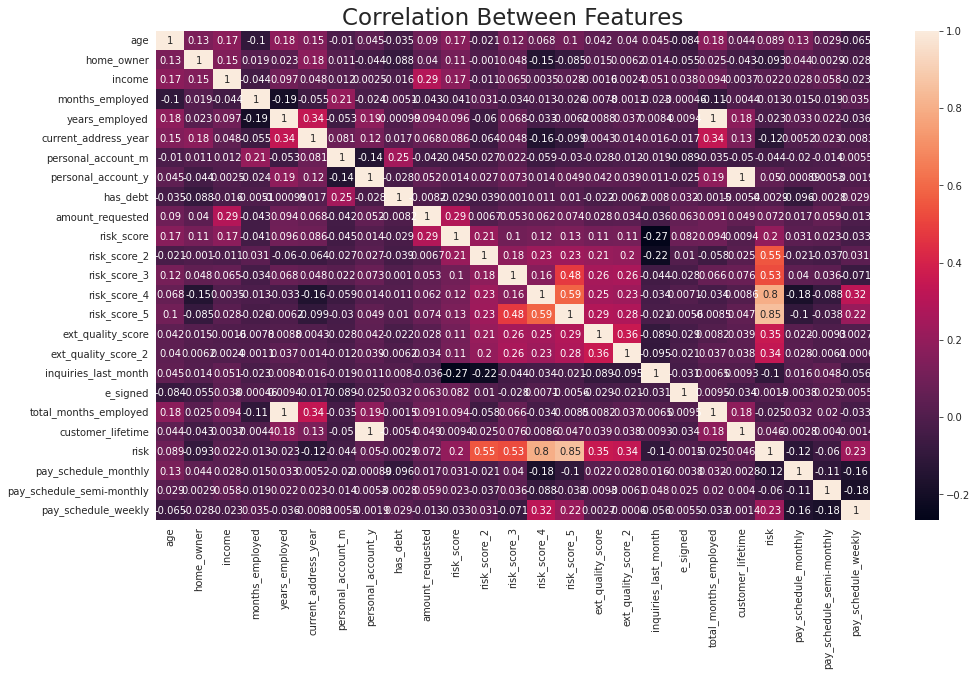

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(train.corr(), annot=True)
plt.title("Correlation Between Features", fontsize=23)
plt.show()

#MODELLING 